**CEE 6410 Streamflow Data and Hydropower Release Analysis Worksheet** 

Author: Patrick Campana

Date: 11/29/2020 Last edited

All flow rates are in CFS


In [74]:

# Install USGS Data Retrieval Package
install.packages('dataRetrieval')
library(dataRetrieval)
library(ggplot2, warn.conflicts = FALSE)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [75]:
#Set Start_Date, End Date, Parameter Code, Stat Code, Time Zone is set to UTC

# # #Dry Year
Start_Date = "2012-10-01"      # Start date, format: YYYY-MM-DD
End_Date = "2013-09-30"

# Average Year
# Start_Date = "2013-10-01"      # Start date, format: YYYY-MM-DD
# End_Date = "2014-09-30"

# # #Wet Year
# Start_Date = "2016-10-01"      # Start date, format: YYYY-MM-DD
# End_Date = "2017-09-30"



ParamCode  = "00060"         #Code for discharge
StatCode = "00003"           # The code for the average values"

#readNWISdv    dv stands for daily values 
#instant or 15 minute average values can be obtained using uv i.e. unit values 

---
**GREEN RIVER NEAR GREEN RIVER WY**


---


Month,GR_Flow_Acftperd
01,52879.34
02,47363.31
03,56624.13
04,48378.84
05,46347.77
06,43943.80
07,43192.07
08,35371.24
09,40710.74
10,52385.45


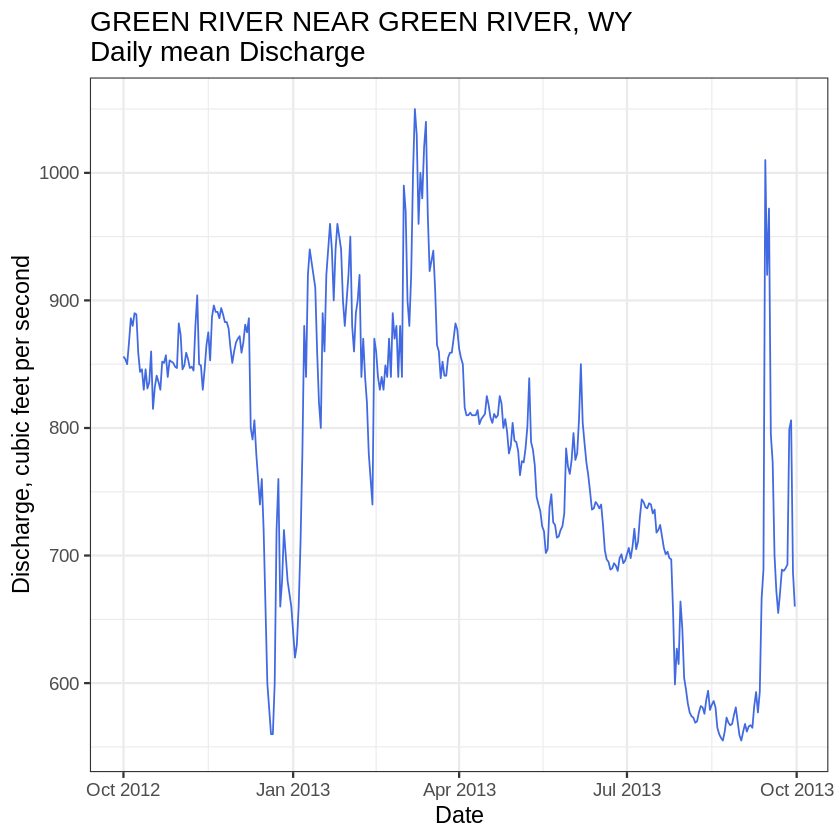

In [76]:
# Select USGS gage ID: Green River Near Green River WY
SiteNumber = "09217000"        # Site ID

#Read gage info to Daily_Q data frame
Daily_Q = readNWISdv(SiteNumber, ParamCode, Start_Date, End_Date, StatCode)

# #Summarize Daily_Q
# summary(Daily_Q)

#Rename Daily Q columns 
Daily_Q = renameNWISColumns(Daily_Q)

#Graph Daily_Q, check for inconsistencies
paramInf = attr(Daily_Q, 'variableInfo')
siteInf = attr(Daily_Q, 'siteInfo')


ts = ggplot(data=Daily_Q, aes(Date, Flow)) +
      xlab("Date") +
      ylab(paramInf$variableDescription) +
      ggtitle(paste0(siteInf$station_nm,"\n","Daily mean Discharge")) +  
      geom_line(color="royalblue") +
      theme_bw(base_size=14) 

ts

Daily_Q$Flow_Acftperd=Daily_Q$Flow*86400/43560
#Create GRData Frame from USGS Data
GRData = data.frame("Day"= format(Daily_Q$Date, '%d'),
                    "Year"= format(Daily_Q$Date, '%Y'),
                    "Month" = format(Daily_Q$Date, '%m'), 
                    "GR_Flow_Acftperd" = Daily_Q$Flow_Acftperd)
# GRData

# #Calculate Sum, Mean, std, max, and min of GR daily Data

Qtotal = aggregate(GR_Flow_Acftperd ~Month, data=GRData, sum) #Total Monthly flow

Qtotal


# write.csv(Qtotal, "GreenRiver_09217000.csv")

---
**HENRY'S FORK NEAR MALINA UT**


---


Month,GR_Flow_Acftperd,HF_Flow_Acftperd
01,52879.34,2568.5950
02,47363.31,2225.4545
03,56624.13,3229.0909
04,48378.84,2623.5372
05,46347.77,5704.5620
06,43943.80,3014.3008
07,43192.07,853.6264
08,35371.24,282.5851
09,40710.74,5340.7736
10,52385.45,832.8397


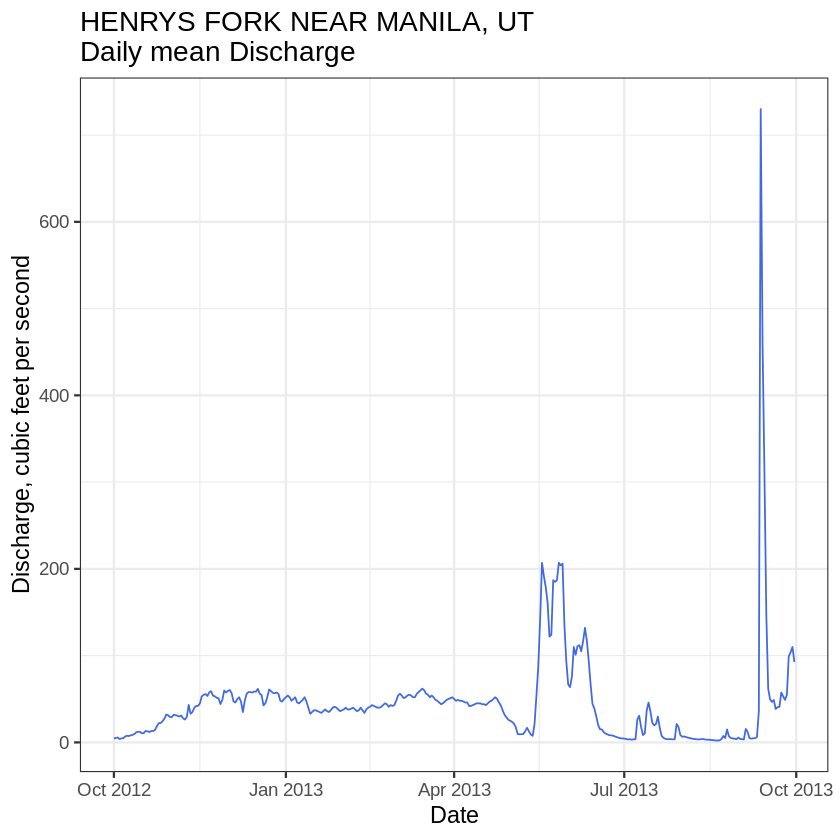

In [77]:


# Select a USGS gage ID.  Henry's Fork Near Malina UT
SiteNumber = "09229500"        # Site ID

#Read gage info to Daily_Q data frame
Daily_Q = readNWISdv(SiteNumber, ParamCode, Start_Date, End_Date, StatCode)

# #Summarize Daily_Q
# summary(Daily_Q)

#Rename Daily Q columns 
Daily_Q = renameNWISColumns(Daily_Q)

#Graph Daily_Q, check for inconsistencies
paramInf = attr(Daily_Q, 'variableInfo')
siteInf = attr(Daily_Q, 'siteInfo')


ts = ggplot(data=Daily_Q, aes(Date, Flow)) +
      xlab("Date") +
      ylab(paramInf$variableDescription) +
      ggtitle(paste0(siteInf$station_nm,"\n","Daily mean Discharge")) +  
      geom_line(color="royalblue") +
      theme_bw(base_size=14) 

ts

Daily_Q$Flow_Acftperd=Daily_Q$Flow*86400/43560
#Create GRData Frame from USGS Data
GRData = data.frame("Day"= format(Daily_Q$Date, '%d'),
                    "Year"= format(Daily_Q$Date, '%Y'),
                    "Month" = format(Daily_Q$Date, '%m'), 
                    "HF_Flow_Acftperd" = Daily_Q$Flow_Acftperd)
# GRData

# #Calculate Sum, Mean, std, max, and min of GR daily Data

Qx = aggregate(HF_Flow_Acftperd ~Month, data=GRData, sum) #Total Monthly flow

Qtotal$HF_Flow_Acftperd=Qx$HF_Flow_Acftperd

Qtotal
# write.csv(Qtotal, "GreenRiver_09217000.csv")

---
**BLACKS FORK NEAR LITTLE AMERICA WY**


---

Month,GR_Flow_Acftperd,HF_Flow_Acftperd,BF_Flow_Acftperd
01,52879.34,2568.5950,653.5537
02,47363.31,2225.4545,696.7934
03,56624.13,3229.0909,8347.2397
04,48378.84,2623.5372,7144.0661
05,46347.77,5704.5620,7550.2810
06,43943.80,3014.3008,2939.3058
07,43192.07,853.6264,2150.6777
08,35371.24,282.5851,175.3785
09,40710.74,5340.7736,9184.8595
10,52385.45,832.8397,1291.5570


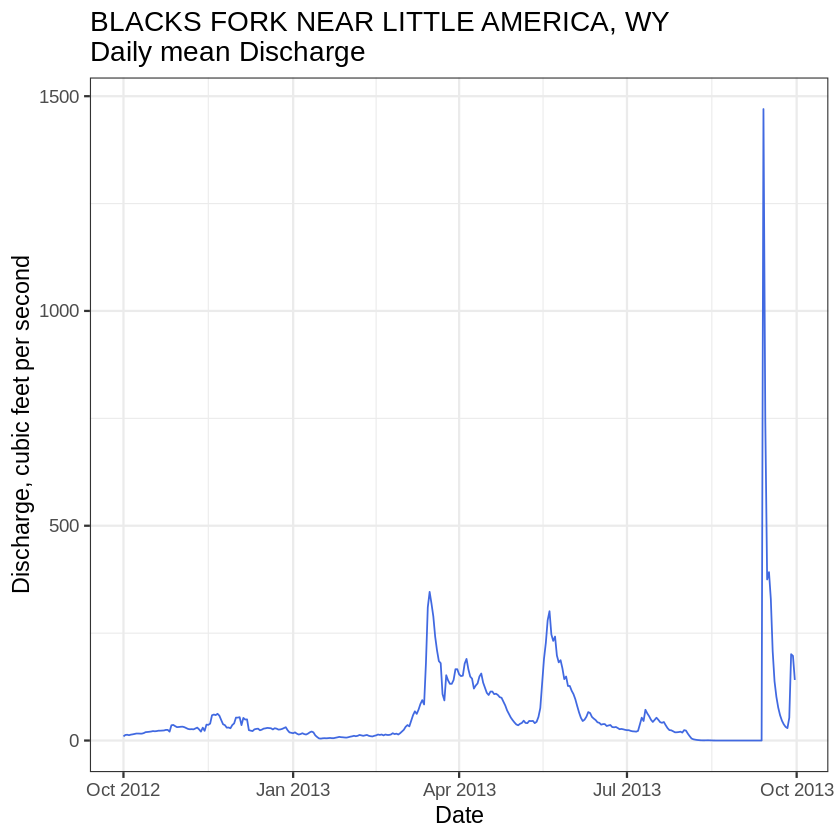

In [78]:


# Select a USGS gage ID.  Blacks Fork Near Little America WY
SiteNumber = "09224700"        # Site ID

#Read gage info to Daily_Q data frame
Daily_Q = readNWISdv(SiteNumber, ParamCode, Start_Date, End_Date, StatCode)

# #Summarize Daily_Q
# summary(Daily_Q)

#Rename Daily Q columns 
Daily_Q = renameNWISColumns(Daily_Q)

#Graph Daily_Q, check for inconsistencies
paramInf = attr(Daily_Q, 'variableInfo')
siteInf = attr(Daily_Q, 'siteInfo')


ts = ggplot(data=Daily_Q, aes(Date, Flow)) +
      xlab("Date") +
      ylab(paramInf$variableDescription) +
      ggtitle(paste0(siteInf$station_nm,"\n","Daily mean Discharge")) +  
      geom_line(color="royalblue") +
      theme_bw(base_size=14) 

ts

Daily_Q$Flow_Acftperd=Daily_Q$Flow*86400/43560
#Create GRData Frame from USGS Data
GRData = data.frame("Day"= format(Daily_Q$Date, '%d'),
                    "Year"= format(Daily_Q$Date, '%Y'),
                    "Month" = format(Daily_Q$Date, '%m'), 
                    "BF_Flow_Acftperd" = Daily_Q$Flow_Acftperd)
# GRData

# #Calculate Sum, Mean, std, max, and min of GR daily Data

Qx = aggregate(BF_Flow_Acftperd ~Month, data=GRData, sum) #Total Monthly flow

Qtotal$BF_Flow_Acftperd=Qx$BF_Flow_Acftperd

Qtotal
# write.csv(Qtotal, "GreenRiver_09217000.csv")

**YAMPA RIVER DEERLODGE GAUGE**
 

Month,GR_Flow_Acftperd,HF_Flow_Acftperd,BF_Flow_Acftperd,Yampa_Flow_Acftperd
01,52879.34,2568.5950,653.5537,10998.347
02,47363.31,2225.4545,696.7934,11345.455
03,56624.13,3229.0909,8347.2397,23892.893
04,48378.84,2623.5372,7144.0661,85410.248
05,46347.77,5704.5620,7550.2810,389573.554
06,43943.80,3014.3008,2939.3058,198585.124
07,43192.07,853.6264,2150.6777,19160.331
08,35371.24,282.5851,175.3785,9625.785
09,40710.74,5340.7736,9184.8595,17789.752
10,52385.45,832.8397,1291.5570,11502.149


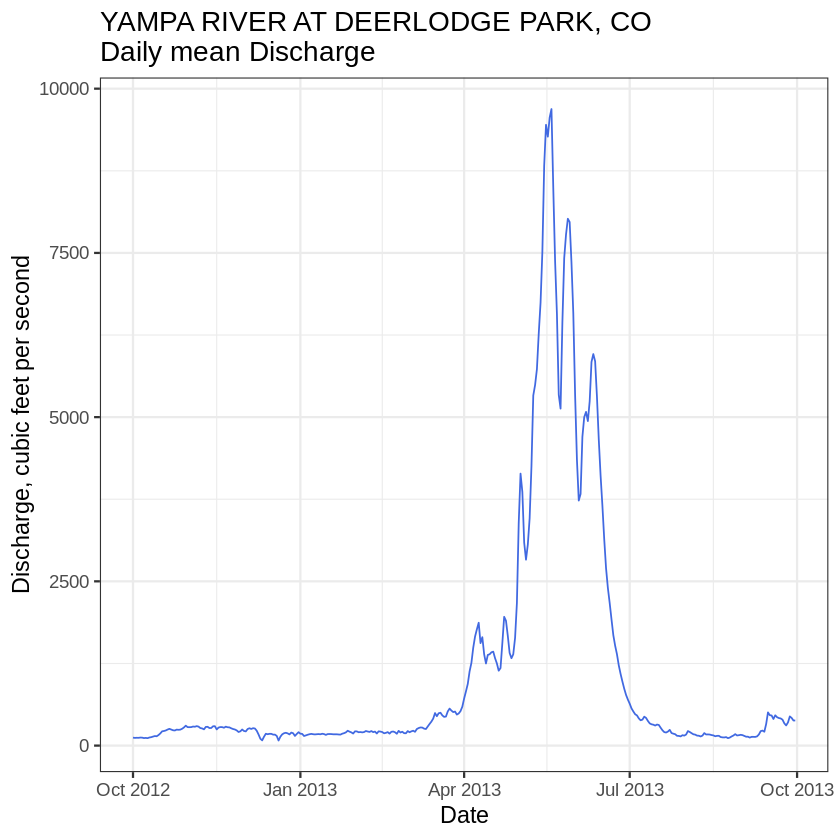

In [79]:
# Select a USGS gage ID.  Yampa River Deerlodge Gauge
SiteNumber = "09260050"        # Site ID

#Read gage info to Daily_Q data frame
Daily_Q = readNWISdv(SiteNumber, ParamCode, Start_Date, End_Date, StatCode)

# #Summarize Daily_Q
# summary(Daily_Q)

#Rename Daily Q columns 
Daily_Q = renameNWISColumns(Daily_Q)

#Graph Daily_Q, check for inconsistencies
paramInf = attr(Daily_Q, 'variableInfo')
siteInf = attr(Daily_Q, 'siteInfo')


ts = ggplot(data=Daily_Q, aes(Date, Flow)) +
      xlab("Date") +
      ylab(paramInf$variableDescription) +
      ggtitle(paste0(siteInf$station_nm,"\n","Daily mean Discharge")) +  
      geom_line(color="royalblue") +
      theme_bw(base_size=14) 

ts

Daily_Q$Flow_Acftperd=Daily_Q$Flow*86400/43560
#Create GRData Frame from USGS Data
GRData = data.frame("Day"= format(Daily_Q$Date, '%d'),
                    "Year"= format(Daily_Q$Date, '%Y'),
                    "Month" = format(Daily_Q$Date, '%m'), 
                    "Yampa_Flow_Acftperd" = Daily_Q$Flow_Acftperd)
# GRData

# #Calculate Sum, Mean, std, max, and min of GR daily Data

Qx = aggregate(Yampa_Flow_Acftperd ~Month, data=GRData, sum) #Total Monthly flow

Qtotal$Yampa_Flow_Acftperd=Qx$Yampa_Flow_Acftperd

Qtotal
write.csv(Qtotal, "WaterYear2013.csv")

Month,GR_Flow_Acftperd,HF_Flow_Acftperd,BF_Flow_Acftperd,Yampa_Flow_Acftperd,GR_Jensen_Flow_Acftperd
01,52879.34,2568.5950,653.5537,10998.347,78684.30
02,47363.31,2225.4545,696.7934,11345.455,95444.63
03,56624.13,3229.0909,8347.2397,23892.893,105480.99
04,48378.84,2623.5372,7144.0661,85410.248,149276.03
05,46347.77,5704.5620,7550.2810,389573.554,439775.21
06,43943.80,3014.3008,2939.3058,198585.124,365732.23
07,43192.07,853.6264,2150.6777,19160.331,99332.23
08,35371.24,282.5851,175.3785,9625.785,87114.05
09,40710.74,5340.7736,9184.8595,17789.752,95147.11
10,52385.45,832.8397,1291.5570,11502.149,70690.91


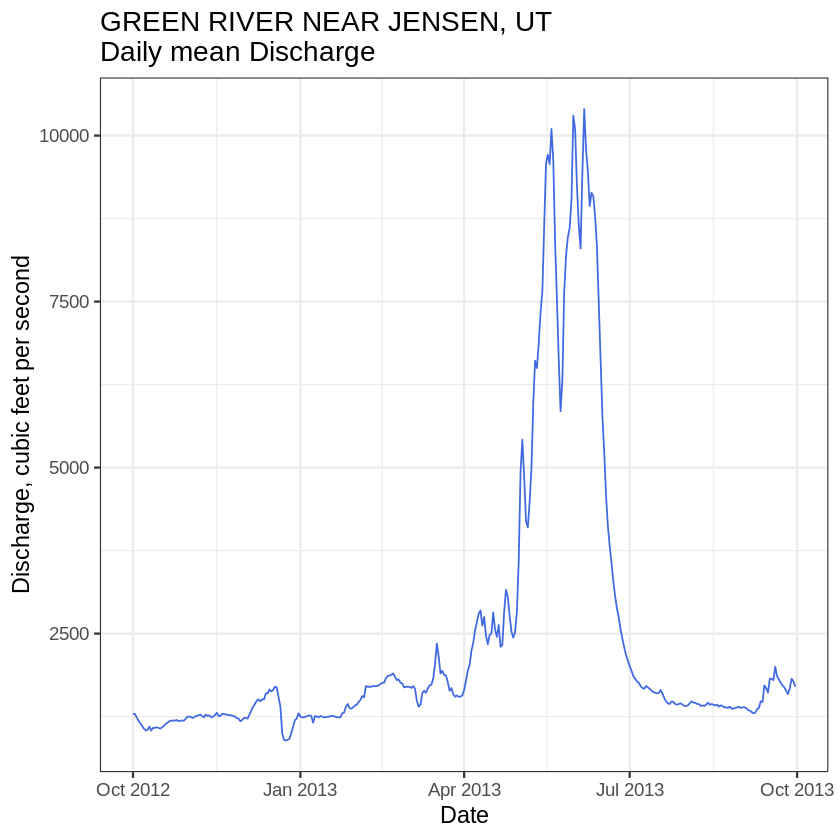

In [80]:
# Select a USGS gage ID.  Yampa River Deerlodge Gauge
SiteNumber = "09261000"        # Site ID

#Read gage info to Daily_Q data frame
Daily_Q = readNWISdv(SiteNumber, ParamCode, Start_Date, End_Date, StatCode)

# #Summarize Daily_Q
# summary(Daily_Q)

#Rename Daily Q columns 
Daily_Q = renameNWISColumns(Daily_Q)

#Graph Daily_Q, check for inconsistencies
paramInf = attr(Daily_Q, 'variableInfo')
siteInf = attr(Daily_Q, 'siteInfo')


ts = ggplot(data=Daily_Q, aes(Date, Flow)) +
      xlab("Date") +
      ylab(paramInf$variableDescription) +
      ggtitle(paste0(siteInf$station_nm,"\n","Daily mean Discharge")) +  
      geom_line(color="royalblue") +
      theme_bw(base_size=14) 

ts

Daily_Q$Flow_Acftperd=Daily_Q$Flow*86400/43560
#Create GRData Frame from USGS Data
GRData = data.frame("Day"= format(Daily_Q$Date, '%d'),
                    "Year"= format(Daily_Q$Date, '%Y'),
                    "Month" = format(Daily_Q$Date, '%m'), 
                    "GR_Jensen_Flow_Acftperd" = Daily_Q$Flow_Acftperd)
# GRData

# #Calculate Sum, Mean, std, max, and min of GR daily Data

Qx = aggregate(GR_Jensen_Flow_Acftperd ~Month, data=GRData, sum) #Total Monthly flow

Qtotal$GR_Jensen_Flow_Acftperd=Qx$GR_Jensen_Flow_Acftperd

Qtotal
write.csv(Qtotal, "WaterYear2013.csv")